In [2]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
x_test=np.load('/content/drive/MyDrive/AI Seminar/test/x_test.npy')
y_test=np.load('/content/drive/MyDrive/AI Seminar/test/y_test.npy')

In [7]:
modelFitLRate=tf.keras.models.load_model('/content/drive/MyDrive/AI Seminar/test/Covid_class.h5')

(3, 150, 150)

In [22]:
mypredict = modelFitLRate.predict(x_test[0:50])
pred = np.argmax(mypredict, axis=-1)
print(pred)

[1 2 2 0 0 0 1 2 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 2 1 0 1 1 0
 2 1 0 0 0 0 0 1 0 1 1 1 0]


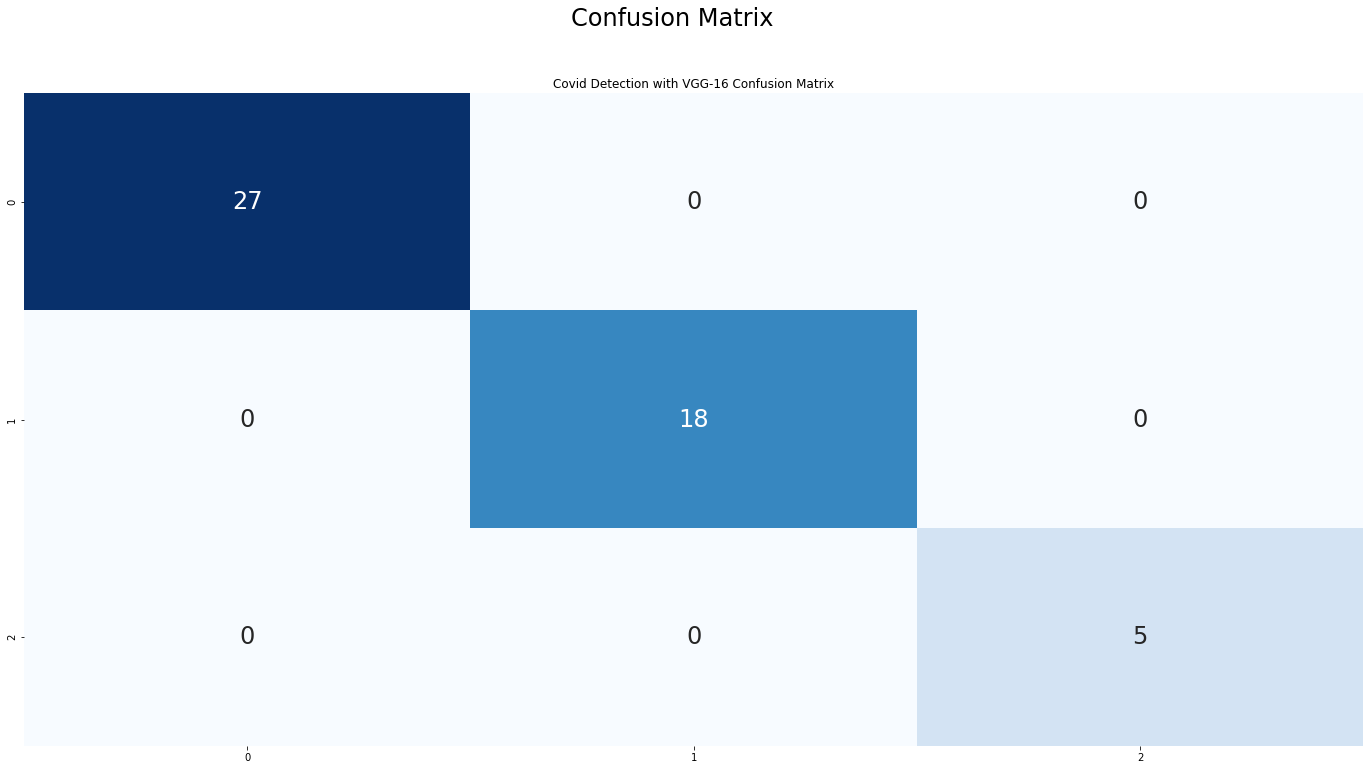

In [23]:
cm = confusion_matrix(y_test[0:50].argmax(axis=1), mypredict.argmax(axis=1))

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrix",fontsize=24)
plt.title("Covid Detection with VGG-16 Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [ ]:
evalute =modelFitLRate.evaluate(x_test, y_test)

10/10 [==============================] - 5s 482ms/step - loss: 0.0771 - accuracy: 0.9699


In [ ]:
classNames = ["normal","COVID_19","viral_pneumonia"]

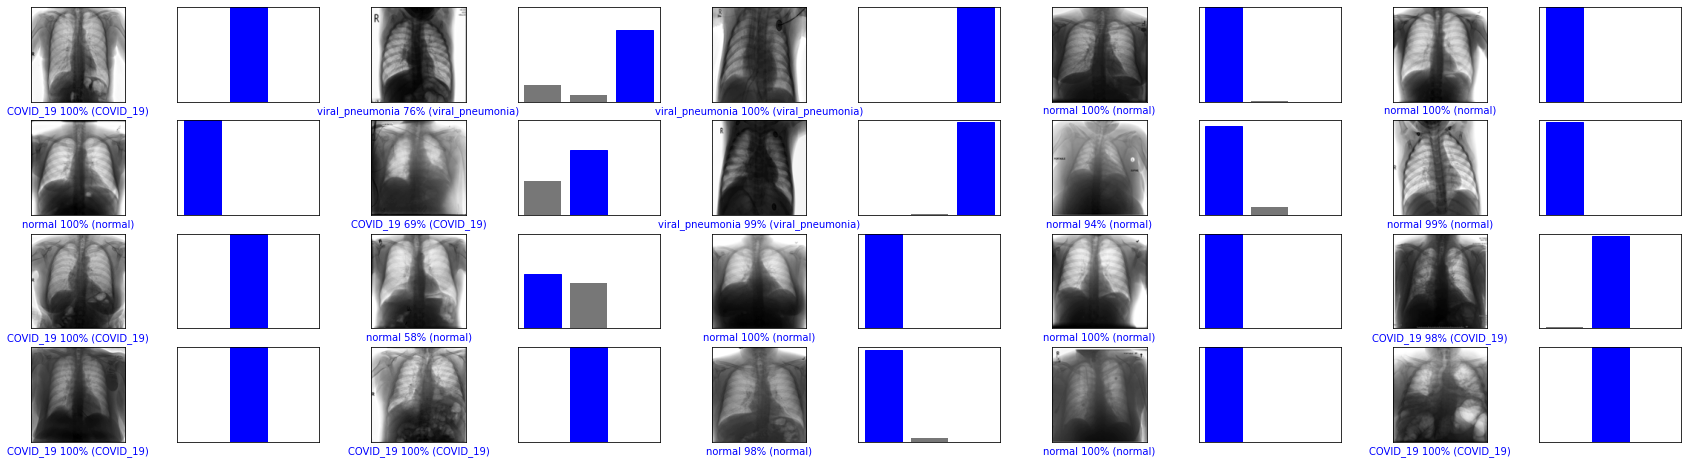

In [ ]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(3), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    img = cv2.resize(img,(128,128))
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    true_label= np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(classNames[predicted_label],
                                100*np.max(predictions_array),
                                classNames[true_label]),
                                color=color)
    
def showResultPrediction(predictions):
    num_rows = 4
    num_cols = 5
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*3*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions, y_test, x_test)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions, y_test)
    plt.show()

showResultPrediction(mypredict)


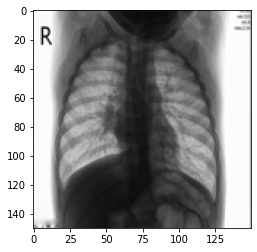

In [25]:
x_test[1]
plt.imshow(x_test[1],cmap=plt.cm.binary)